<a href="https://colab.research.google.com/github/ykkimhgu/DLIP-src/blob/main/Tutorial_MNIST_MLP_Keras_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DLIP Tutorial MLP using Keras**
## XOR problem using Keras
Y.-K. Kim
(updated 2021. 5. 3) 

Also, refer to  https://keras.io/guides/sequential_model/

## Import Keras and Numpy

In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
from tensorflow.keras import layers
print(keras.__version__)

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
import numpy as np 

2.4.1
2.4.0


## Prepare Datasets: Input and Output

In [17]:
from tensorflow.keras.datasets import mnist

# MNIST
# This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
(x_train, y_train), (x_test, y_test)=mnist.load_data(path="mnist.npz")



### Open some image datasts

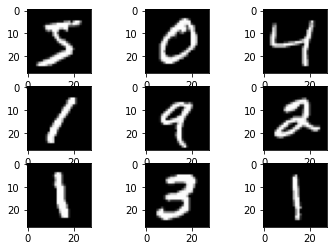

In [18]:
from matplotlib import pyplot

# plot first 9 images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

### Normalization of dataset

In [20]:
# Scale images to [0,1] range for normalization and 8-bit grayscale
#  **numpy.ndarray.astype** changes data type
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

# Check the dimension of data
print("check data dim")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

# make sure images have shape (28, 28, 1)
# careful not to execute repeatevily. For it augments new axis

check data dim
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


Reshape the data  to 1-D input data form for MLP. 

In [21]:
# Configuration options
feature_vector_length = 28*28
num_classes = 10

x_train = x_train.reshape(x_train.shape[0], feature_vector_length)
x_test = x_test.reshape(x_test.shape[0], feature_vector_length)

# Check the dimension of data
print("Modified Input dim")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

Modified Input dim
x_train shape: (60000, 784)
x_test shape: (10000, 784)


 Convert class vectors to binary class matrices ' Categorical'

In [22]:
print("y_train raw")
display(y_train.shape)
display(y_train[0])

y_train=keras.utils.to_categorical(y_train, num_classes)
y_test=keras.utils.to_categorical(y_test, num_classes)
print("\n y_train binary")
display(y_train.shape)
#display(y_train)
display(y_train[0])

y_train raw


(60000,)

5


 y_train binary


(60000, 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [6]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


## Build MLP model


In [7]:
# Create the model
model = Sequential()
model.add(Dense(100, input_shape=input_shape, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 35)                3535      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                360       
Total params: 82,395
Trainable params: 82,395
Non-trainable params: 0
_________________________________________________________________


## Activation function

For exercise, we have used  "sigmoid" for the activation function. 
You may change the function to "tanh", “relu”, "leaky-relu"  for hidden layer and “sigmoid” for output layer.

```
model.add(Activation('tanh'))
```

## Weight Initialization
 In Keras, dense layers by default uses “glorot_uniform” random initializer, it is also called Xavier normal initializer.

## Optimizer function
 Gradient descent is the common optimisation strategy used in neural networks. Many of the variants and advanced optimisation functions now are available, 
  
- Stochastic Gradient Descent[sgd]
- Adagrad
- Adamax
- RMSprop
- Adam   (Keras default optimizer)

## Loss function

Example:
1. Linear regression->Mean Squared Error
2. Classification->Cross entropy

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model
fit method
```
Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
```

In [10]:
model.fit(x_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/10
192/192 [==============================] - 1s 5ms/step - loss: 0.9728 - accuracy: 0.7212 - val_loss: 0.2288 - val_accuracy: 0.9346
Epoch 2/10
192/192 [==============================] - 1s 4ms/step - loss: 0.2132 - accuracy: 0.9385 - val_loss: 0.1665 - val_accuracy: 0.9526
Epoch 3/10
192/192 [==============================] - 1s 4ms/step - loss: 0.1522 - accuracy: 0.9566 - val_loss: 0.1452 - val_accuracy: 0.9582
Epoch 4/10
192/192 [==============================] - 1s 4ms/step - loss: 0.1156 - accuracy: 0.9668 - val_loss: 0.1272 - val_accuracy: 0.9650
Epoch 5/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0954 - accuracy: 0.9726 - val_loss: 0.1137 - val_accuracy: 0.9663
Epoch 6/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0823 - accuracy: 0.9762 - val_loss: 0.1098 - val_accuracy: 0.9666
Epoch 7/10
192/192 [==============================] - 1s 4ms/step - loss: 0.0726 - accuracy: 0.9795 - val_loss: 0.1019 - val_accuracy: 0.9707
Epoch 

## Evaluate the trained model

In [13]:
score=model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9749
Test loss: 0.0843985304236412
Test accuracy:  0.9749000072479248


## Test a sample image (Exercise)

# Exercise

## Exercise 1
Predict a test image of your handwriting.


## Exercise 2
Change the MLP model layers, activation functions and optimization types for a better output.